# M5-Low-model

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
data =pd.read_csv("Crypto_data2.csv")

In [31]:
data

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Crypto
0,0,2014-12-09,361.894989,363.066986,344.950989,352.218994,352.218994,32915500,BTC
1,1,2014-12-10,352.204987,352.384003,346.364990,346.364990,346.364990,16427700,BTC
2,2,2014-12-11,344.339996,361.356995,338.763000,350.506012,350.506012,32431300,BTC
3,3,2014-12-12,350.833008,352.983002,349.290985,352.541992,352.541992,16989800,BTC
4,4,2014-12-13,352.381012,352.381012,346.588013,347.376007,347.376007,11675900,BTC
...,...,...,...,...,...,...,...,...,...
10129,1570,2022-03-09,1754.225098,1918.758301,1747.854126,1913.793213,1913.793213,65771052,MKR
10130,1571,2022-03-10,1912.570557,1914.414185,1765.506348,1773.745972,1773.745972,62791406,MKR
10131,1572,2022-03-11,1773.831665,1793.170654,1709.868164,1750.467651,1750.467651,56816724,MKR
10132,1573,2022-03-12,1750.544189,1788.684692,1744.583252,1744.610962,1744.610962,36075999,MKR


In [32]:
data.isnull().any()

Unnamed: 0    False
Date          False
Open          False
High          False
Low           False
Close         False
Adj Close     False
Volume        False
Crypto        False
dtype: bool

In [33]:
data.isnull().sum()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Crypto        0
dtype: int64

In [34]:
data.dropna(inplace =True)

In [35]:
data.isnull().sum()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Crypto        0
dtype: int64

In [36]:
data.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'Crypto'],
      dtype='object')

In [37]:
data.drop(['Unnamed: 0', 'Adj Close','Volume' ],axis =1, inplace =True)
data

,Date,Open,High,Low,Close,Crypto
0,2014-12-09,361.894989,363.066986,344.950989,352.218994,BTC
1,2014-12-10,352.204987,352.384003,346.364990,346.364990,BTC
2,2014-12-11,344.339996,361.356995,338.763000,350.506012,BTC
3,2014-12-12,350.833008,352.983002,349.290985,352.541992,BTC
4,2014-12-13,352.381012,352.381012,346.588013,347.376007,BTC
...,...,...,...,...,...,...
10129,2022-03-09,1754.225098,1918.758301,1747.854126,1913.793213,MKR
10130,2022-03-10,1912.570557,1914.414185,1765.506348,1773.745972,MKR
10131,2022-03-11,1773.831665,1793.170654,1709.868164,1750.467651,MKR
10132,2022-03-12,1750.544189,1788.684692,1744.583252,1744.610962,MKR


# Make  target value in USD

In [38]:
#data["Today_USD"] =  (data["Open"] + data["Close"] ) /2
data["Today_USD"] =  (data["Low"])


In [39]:
data["Crypto"].unique()

array(['BTC', 'LTC', 'BNB', 'ETH', 'MKR'], dtype=object)

In [40]:
# making tomorrow result 
for id, crip in enumerate(data["Crypto"].unique()):
    ind_cript = data[data["Crypto"] == crip]
    ind_cript["Tomorrow_price(USD)"] =ind_cript["Today_USD"].shift(-1) 
    ind_cript.head()
    ind_cript.dropna(inplace =True)
    if (id ==0 ):
        BTC =ind_cript
    elif (id ==1 ):
        ADA = ind_cript
    elif (id == 2 ):
        BNB = ind_cript
    elif (id == 3 ):
        ETH = ind_cript
    elif (id == 4 ):
        USDT = ind_cript
        

file = pd.concat([BTC,ETH, BNB, ADA, USDT])
#files = pd.concat([BTC,ETH, BNB])

In [41]:
file.tail()

,Date,Open,High,Low,Close,Crypto,Today_USD,Tomorrow_price(USD)
10128,2022-03-08,1745.794800,1790.965698,1722.096802,1754.612671,MKR,1722.096802,1747.854126
10129,2022-03-09,1754.225098,1918.758301,1747.854126,1913.793213,MKR,1747.854126,1765.506348
10130,2022-03-10,1912.570557,1914.414185,1765.506348,1773.745972,MKR,1765.506348,1709.868164
10131,2022-03-11,1773.831665,1793.170654,1709.868164,1750.467651,MKR,1709.868164,1744.583252
10132,2022-03-12,1750.544189,1788.684692,1744.583252,1744.610962,MKR,1744.583252,1695.159424


In [42]:
for x, y in enumerate(data["Crypto"].unique()):
    file["Crypto"] = file["Crypto"].replace({y:  x})
    print("The Crypto ", y, " is =", x)
    

The Crypto  BTC  is = 0
The Crypto  LTC  is = 1
The Crypto  BNB  is = 2
The Crypto  ETH  is = 3
The Crypto  MKR  is = 4


In [43]:
file["Crypto"].unique()

array([0, 3, 2, 1, 4], dtype=int64)

In [44]:
file.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Crypto', 'Today_USD',
       'Tomorrow_price(USD)'],
      dtype='object')

In [45]:
file.drop(["Date","Today_USD"], inplace =True, axis =True)

# Scaling

In [46]:
file.head()

,Open,High,Low,Close,Crypto,Tomorrow_price(USD)
0,361.894989,363.066986,344.950989,352.218994,0,346.364990
1,352.204987,352.384003,346.364990,346.364990,0,338.763000
2,344.339996,361.356995,338.763000,350.506012,0,349.290985
3,350.833008,352.983002,349.290985,352.541992,0,346.588013
4,352.381012,352.381012,346.588013,347.376007,0,345.417999


In [47]:
from sklearn.model_selection import train_test_split

X = file.iloc[:,:-1]
Y = file.iloc[:,-1]

In [48]:
#X.to_csv("Crypto_input.csv")

In [49]:
from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler()
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X)
X_sc = scaler_x.transform(X)
Y_sc = scaler_y.fit(file[["Tomorrow_price(USD)"]])
Y_sc =scaler_y.fit_transform(file[["Tomorrow_price(USD)"]])
X_sc,Y_sc


(array([[0.00534048, 0.00525849, 0.00517976, 0.00519586, 0.        ],
        [0.00519703, 0.00510318, 0.00520106, 0.00510922, 0.        ],
        [0.00508059, 0.00523363, 0.00508654, 0.00517051, 0.        ],
        ...,
        [0.02829693, 0.02781098, 0.0265798 , 0.02623505, 1.        ],
        [0.02624301, 0.02604842, 0.02574164, 0.02589052, 1.        ],
        [0.02589826, 0.0259832 , 0.02626461, 0.02580384, 1.        ]]),
 array([[0.00520106],
        [0.00508654],
        [0.00524514],
        ...,
        [0.02574164],
        [0.02626461],
        [0.02552006]]))

In [50]:
#X,Y

In [51]:
#scaler_x.inverse_transform(X_sc)
#scaler_y.inverse_transform(Y_sc)


In [52]:
X_train,X_test, Y_train, Y_test = train_test_split( X_sc, Y_sc,test_size = 0.2, random_state = 42)

# machine learning algarithams comparitions

In [53]:
#conda install -c conda-forge xgboost

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
#from xgboost import XGBRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge 
from sklearn.ensemble import RandomForestRegressor 
lr = LinearRegression()
svr =SVR()
sgdr = SGDRegressor()
ls = Lasso()
xgbr = XGBRegressor()
r = Ridge()
rfr = RandomForestRegressor()

alg = [lr, svr, sgdr, ls, r,rfr, xgbr]

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from math import sqrt

#rms = sqrt(mean_squared_error(y_actual, y_predicted))

LinearRegression() 
 mse =  49487.96871738523 ;
 rms =  222.45891467276655 
 mae =  68.69722566727089 
 R2 =  0.9994120465944457

SVR() 
 mse =  31555944.649907134 ;
 rms =  5617.467814763796 
 mae =  5422.511051155192 
 R2 =  0.6250922071918266

SGDRegressor() 
 mse =  233298.447685367 ;
 rms =  483.009780113578 
 mae =  310.79861011071006 
 R2 =  0.9972282431390451

Lasso() 
 mse =  84212786.53560737 ;
 rms =  9176.75250486834 
 mae =  4720.682256302009 
 R2 =  -0.0005097383888124085

Ridge() 
 mse =  86019.68146956299 ;
 rms =  293.2911206797147 
 mae =  91.44670657805976 
 R2 =  0.9989780230230594

RandomForestRegressor() 
 mse =  67992.92593289608 ;
 rms =  260.75453195082935 
 mae =  73.12072455665695 
 R2 =  0.9991921941152173

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rat

<AxesSubplot:xlabel='count'>

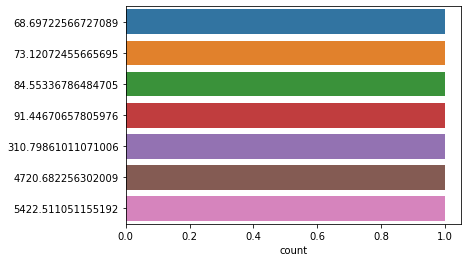

In [57]:
Mae = []
Alg = []
for  x in alg:
    x.fit(X_train, Y_train)
    pred = x.predict(X_test)
    
# convert scaller to normal (inverse scalling)

    if len(pred.shape) ==1:
        p = (np.array([pred]).T)

        pr = scaler_y.inverse_transform(p)
        y_t = scaler_y.inverse_transform(Y_test)
        mse = mean_squared_error(y_t, pr)
        rms = np.sqrt(mse)
        mae = mean_absolute_error(y_t, pr)
        r2 = r2_score(y_t, pr)
    else:
        pr = scaler_y.inverse_transform(pred)
        y_t = scaler_y.inverse_transform(Y_test)
        mse = mean_squared_error(y_t, pr)
        rms = np.sqrt(mse)
        mae = mean_absolute_error(y_t, pr)
        r2 = r2_score(y_t, pr)
    Mae.append(mae)
    Alg.append(x)
    

    print(x,"\n mse = ",mse,";\n rms = ",rms,"\n mae = ", mae, "\n R2 = ",r2)
    print()

sns.countplot(y = Mae)



# Prediction Testiong

In [58]:

lr.fit(X_train, Y_train)
predictlr = lr.predict(X_test)
mse = mean_squared_error(Y_test, predictlr)
rms = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictlr)
r2 = r2_score(Y_test, predictlr)

print(x,"\n mse = ",mse,";  rms = ",rms," mse = ", mae, "R2 = ",r2)
print()
predictlr

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) 
 mse =  1.1230852343874917e-05 ;  rms =  0.0033512463866261634  mse =  0.001034893699932572 R2 =  0.9994120465944457



array([[0.00593712],
       [0.00675464],
       [0.10968038],
       ...,
       [0.00785851],
       [0.00476154],
       [0.0016778 ]])

actual value form testing dataset

In [59]:
scaler_y.inverse_transform(Y_test)[:10]

array([[ 379.066986],
       [ 446.062012],
       [7236.790039],
       [  58.525059],
       [  14.932237],
       [9104.735352],
       [  47.268829],
       [4272.109863],
       [6354.240234],
       [ 669.825012]])

predicted value

In [60]:
scaler_y.inverse_transform(predictlr)[:10]

array([[ 395.2256565 ],
       [ 449.49299024],
       [7281.80115804],
       [  65.82731601],
       [  15.77193434],
       [8947.1161869 ],
       [  52.75790772],
       [4585.05247055],
       [6225.55914895],
       [ 697.47783232]])

In [62]:
import joblib
joblib.dump(lr,"Low_lr_sc.pkl")

['Low_lr_sc.pkl']